<a href="https://colab.research.google.com/github/AdiKk69/CalendaFlow/blob/main/Emotion_Detection_AI_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import the required libraries
import cv2
import dlib
import math
import gdown
import unittest
import numpy as np
import urllib.request

from scipy.spatial import distance
from matplotlib import pyplot as plt

###Getting the Dlib Shape predictor

dlibshape_url = 'https://drive.google.com/uc?id=17D3D89Gke6i5nKOvmsbPslrGg5rVgOwg'
dlibshape_path ='./shape_predictor_68_face_landmarks.dat'
gdown.download(dlibshape_url, dlibshape_path, True)

print ("Done")

Done


In [3]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()

In [4]:
'''
  Converts dlib rectangular object to bounding box co-ordinates
'''
def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

In [5]:
"""
Detects the face in the given image
"""
def detect_face(image_url):
  try:

    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)

  except Exception as e:
    return "Please check the URL and try again!"

  #Detect faces using dlib model
  rects = frontalface_detector(image, 1)

  if len(rects) < 1:
    return "No Face Detected"

  # Loop over the face detections
  for (i, rect) in enumerate(rects):
    # Converts dlib rectangular object to bounding box co-ordinates
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  plt.imshow(image, interpolation='nearest')
  plt.axis('off')
  plt.show()


Enter the URL of the image: https://ak8.picdn.net/shutterstock/videos/27180628/thumb/1.jpg


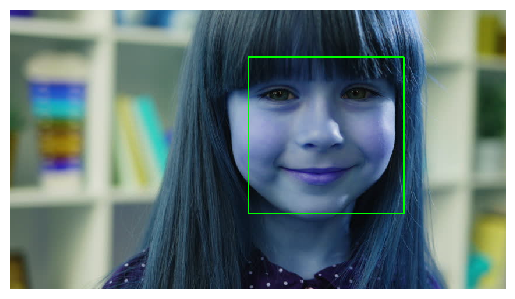

In [6]:
# Give the path of the image for face detection
detect_face(input('Enter the URL of the image: '));

In [7]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()
#Load the 68 face Landmark file
landmark_predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

In [8]:
"""
Returns facial landmarks for the given input image path
"""
def get_landmarks(image_url):

  try:

    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)

  except Exception as e:
    print ("Please check the URL and try again!")
    return None,None

  #Detect the Faces within the image
  faces = frontalface_detector(image, 1)
  if len(faces):
    landmarks = [(p.x, p.y) for p in landmark_predictor(image, faces[0]).parts()]
  else:
    return None,None

  return image,landmarks

In [9]:
"""
Display image with its Facial Landmarks
"""
def image_landmarks(image,face_landmarks):
  radius = -1
  circle_thickness = 5
  image_copy = image.copy()
  for (x, y) in face_landmarks:
    cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)

  plt.imshow(image_copy, interpolation='nearest')
  plt.axis('off')
  plt.show()

Enter the URL of the image: https://ak8.picdn.net/shutterstock/videos/27180628/thumb/1.jpg


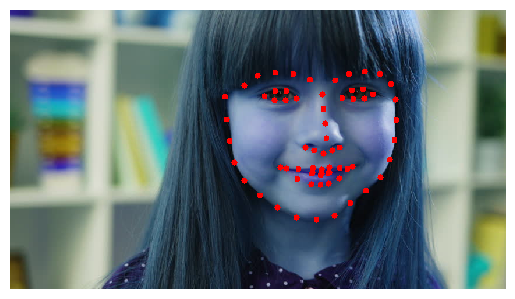

In [10]:
#Extract the Facial Landmark co-ordinates
image,landmarks= get_landmarks(input("Enter the URL of the image: ")) #url

#Plot the Facial Landmarks on the face
if landmarks:
  image_landmarks(image,landmarks)
else:
  print ("No Landmarks Detected")

In [11]:
# Run (and eventually edit) this cell to visualize the features we've extracted

def show_indices(landmarks, i_index):

  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2, len(landmarks))],
              y=[-landmarks[i][1] for i in range(len(landmarks)//2, len(landmarks))], s=50, alpha=.5, color='blue', label='second half of indices')

  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2)],
              y=[-landmarks[i][1] for i in range(len(landmarks)//2)], color='red', alpha=.5, label='first half of indices')

  plt.axis('off');
  plt.legend(bbox_to_anchor=[1,1]);
  plt.title('Visualizing the features we\'ve extracted from this image',y =1.2);

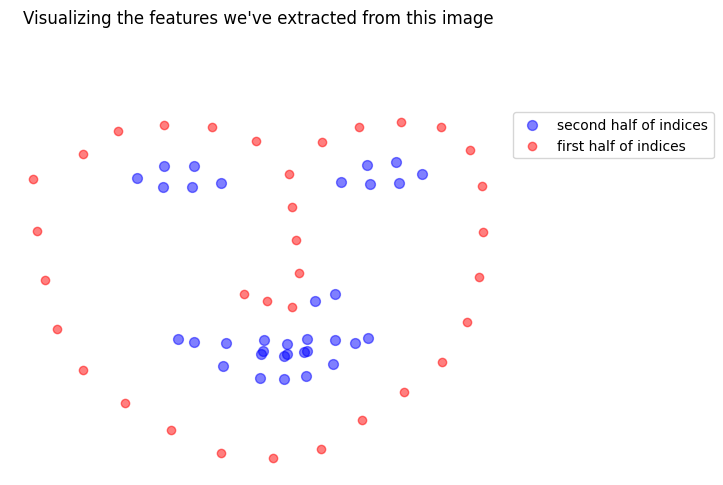

In [12]:
show_index = 30
show_indices(landmarks, show_index)

In [13]:
i_landmark = landmarks[0:10]

print(i_landmark, type(i_landmark))

[(369, 150), (372, 189), (377, 226), (385, 263), (402, 294), (429, 319), (459, 340), (492, 357), (526, 361), (557, 354)] <class 'list'>


In [14]:
landmarks

[(369, 150),
 (372, 189),
 (377, 226),
 (385, 263),
 (402, 294),
 (429, 319),
 (459, 340),
 (492, 357),
 (526, 361),
 (557, 354),
 (584, 332),
 (611, 311),
 (636, 288),
 (652, 258),
 (660, 224),
 (663, 190),
 (662, 155),
 (402, 131),
 (425, 114),
 (455, 109),
 (486, 111),
 (515, 121),
 (558, 122),
 (582, 111),
 (609, 107),
 (635, 111),
 (654, 128),
 (536, 146),
 (538, 171),
 (541, 196),
 (543, 221),
 (507, 237),
 (522, 242),
 (538, 247),
 (553, 242),
 (566, 237),
 (437, 149),
 (455, 140),
 (474, 140),
 (492, 153),
 (473, 156),
 (454, 156),
 (570, 152),
 (587, 139),
 (606, 137),
 (623, 146),
 (608, 153),
 (589, 154),
 (464, 271),
 (495, 274),
 (520, 272),
 (535, 275),
 (548, 271),
 (566, 272),
 (588, 270),
 (565, 290),
 (547, 299),
 (533, 301),
 (517, 300),
 (493, 291),
 (474, 273),
 (519, 280),
 (535, 282),
 (548, 280),
 (579, 274),
 (546, 281),
 (533, 284),
 (518, 282)]

(354.3, 677.7, -373.7, -94.3)

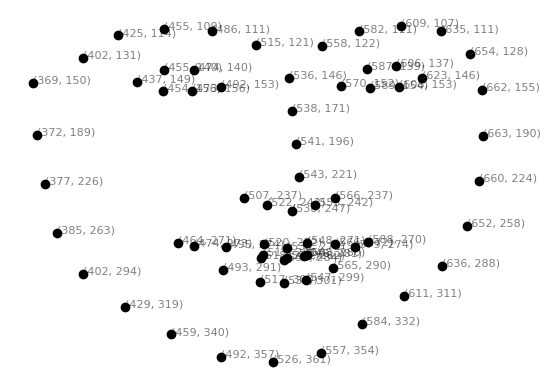

In [15]:
for i_landmark in landmarks:

  plt.scatter(x=i_landmark[0], y=-i_landmark[1], color='black')

  plt.annotate(str(i_landmark), xy=(i_landmark[0], -i_landmark[1]), size=8, alpha=.5)
plt.axis('off')

In [16]:
landmark_indices = {'eyes':(36,47),
                    "nose":(27,35),
                    "mouth":(48,67),
                    "jawline":(0,17),
                    "eyebrow":(18,27)}

landmark_indices.keys()

dict_keys(['eyes', 'nose', 'mouth', 'jawline', 'eyebrow'])

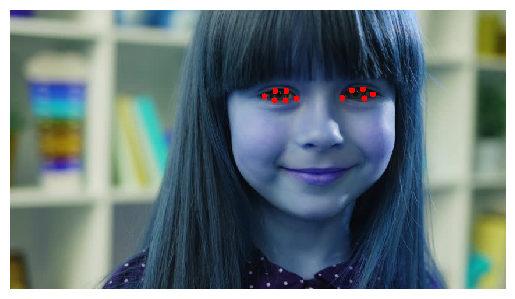

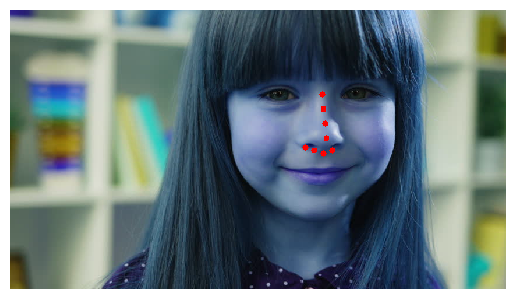

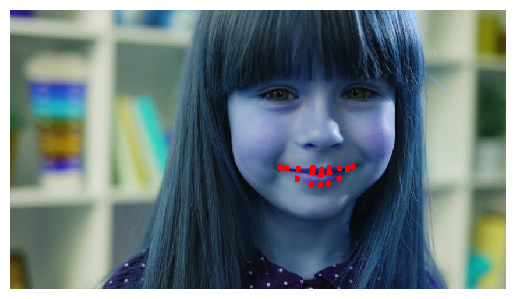

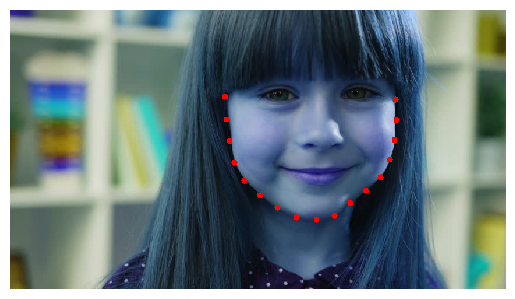

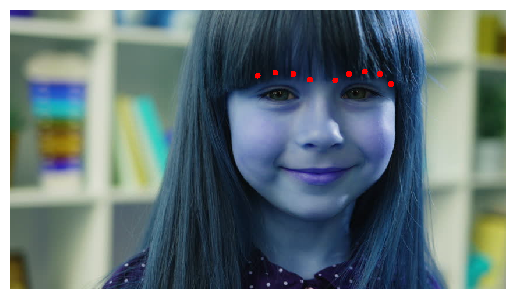

In [17]:
for i_landmark in landmark_indices.keys():

  i_indices = landmark_indices[i_landmark]
  selected_landmarks = landmarks[i_indices[0]:i_indices[1]]
  image_landmarks(image,selected_landmarks)

[(437, 149), (455, 140), (474, 140), (492, 153), (473, 156), (454, 156), (570, 152), (587, 139), (606, 137), (623, 146), (608, 153), (589, 154)]


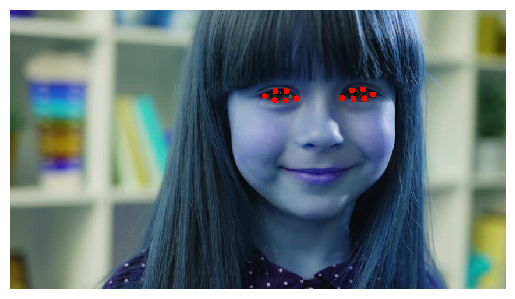

In [18]:
eye_points = np.array([36,47])
selected_landmarks = landmarks[eye_points[0]:eye_points[1]+1]
print(selected_landmarks)
image_landmarks(image,selected_landmarks)

EYES DETECTION


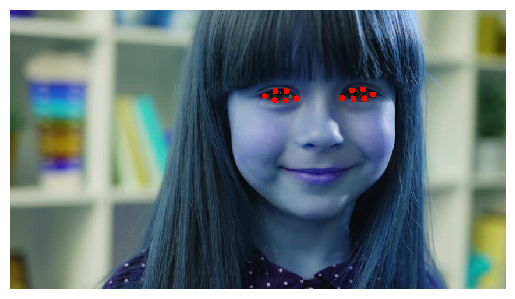

NOSE DETECTION


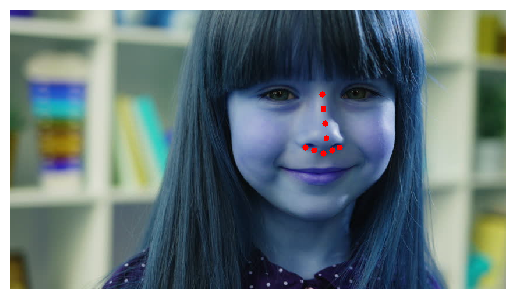

MOUTH DETECTION


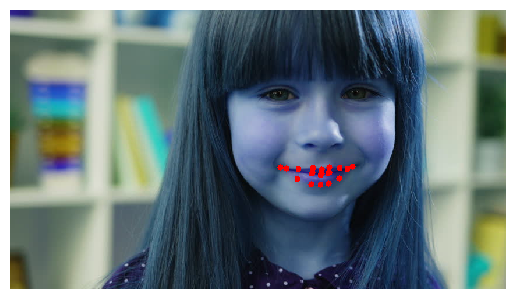

JAWLINE DETECTION


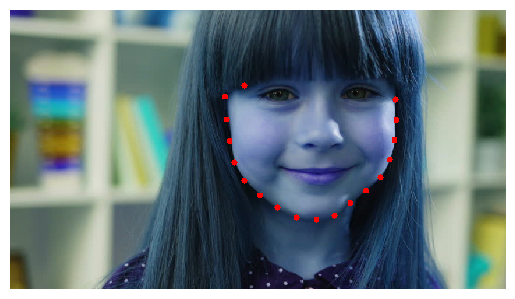

EYEBROWS DETECTION


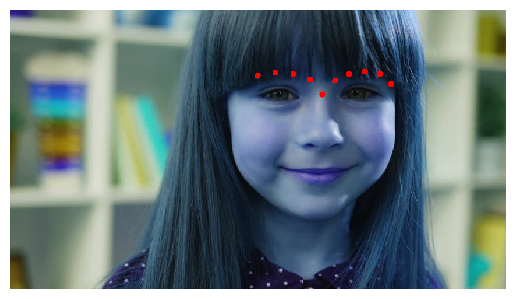

In [19]:
FACIAL_LANDMARKS_IDXS = {"EYES":(36,47),
                         "NOSE":(27,35),
                         "MOUTH":(48,67),
                        "JAWLINE":(0,17),
                        "EYEBROWS":(18,27)}

for key,value in FACIAL_LANDMARKS_IDXS.items():
  print (key,"DETECTION")
  selected_landmarks = landmarks[value[0]:value[1]+1]
  image_landmarks(image, selected_landmarks)

In [20]:
def euclidean_distance(p1,p2):
  distance =  math.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)
  return distance

In [21]:
"""
Distinguishes between two images--->closed eyes v/s open eyes
"""
def classify_images(image1_path,image2_path,plt_flag):
  image1,image1_landmarks = get_landmarks(image1_path)
  image2,image2_landmarks = get_landmarks(image2_path)

  if plt_flag:
    #Plot image1
    plt.imshow(image1, interpolation='nearest')
    plt.title("Image1")
    plt.show()

    #Plot image2
    plt.imshow(image2, interpolation='nearest')
    plt.title("Image2")
    plt.show()

In [22]:
"""
Distinguishes between two images--->closed eyes v/s open eyes
"""
def classify_images(image1_path, image2_path, plt_flag):

  image1,image1_landmarks = get_landmarks(image1_path)
  image2,image2_landmarks = get_landmarks(image2_path)

  if plt_flag:
    #Plot image1
    plt.imshow(image1, interpolation='nearest')
    plt.title("Image1")
    plt.show()

    #Plot image2
    plt.imshow(image2, interpolation='nearest')
    plt.title("Image2")
    plt.show()


  # Points of interest for eyes among which distance needs to be computed
  pairs_distance = [(37,41),(38,40),(43,47),(44,48)]

  e_sum1 = 0
  e_sum2 = 0
  threshold_value = 10
  for pair in pairs_distance:

    e_sum1 = e_sum1 + euclidean_distance(image1_landmarks[pair[0]],
                                         image1_landmarks[pair[1]])
    e_sum2 = e_sum2 + euclidean_distance(image2_landmarks[pair[0]],
                                         image2_landmarks[pair[1]])
  print (e_sum1,e_sum2)

  e_difference = e_sum1 - e_sum2
  print (e_difference)
  if int(e_difference) == 0:
    return ("Both images have eyes open or closed")

  if abs(e_difference) >= threshold_value:

    if e_difference > 0:
        return ("Image1 : Eyes Open, Image2 : Eyes Close")
    else:
        return ("Image1 : Eyes Close, Image2 : Eyes Open")


In [23]:
#@title Facial Landmarks

import pickle
import warnings

import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

###Getting the csv data loaded

dataset_url = 'https://drive.google.com/uc?id=1xFiYsULlQWWmi2Ai0fHjtApniP5Pscuf'
dataset_path = './ferdata.csv'
gdown.download(dataset_url, dataset_path, True)

###Getting the Dlib Shape predictor!

dlibshape_url = 'https://drive.google.com/uc?id=17D3D89Gke6i5nKOvmsbPslrGg5rVgOwg'
dlibshape_path ='./shape_predictor_68_face_landmarks.dat'
gdown.download(dlibshape_url, dlibshape_path, True)

###Getting the Xpure loaded

pureX_url = 'https://drive.google.com/uc?id=1CglpXodenZVrkaZehLtfykfQv8dcnfO9'
pureX_path = './pureX.npy'
gdown.download(pureX_url, pureX_path,True)

###Getting the Xdata loaded

dataX_url = 'https://drive.google.com/uc?id=1sIJGxUM6rNBcWxucs6iynDepeKU1Q56p'
dataX_path = './dataX.npy'
gdown.download(dataX_url, dataX_path, True)


###Getting the Ydata loaded

dataY_url = 'https://drive.google.com/uc?id=1Rfr0OP-hZO_UZfuOyMNR2RjNRAro85zE'
dataY_path = './dataY.npy'
gdown.download(dataY_url, dataY_path, True)

print ("Data Downloaded!")


Data Downloaded!


In [24]:
#Integer to Label Mapping
label_map = {0:"ANGRY",1:"HAPPY",2:"SAD",3:"SURPRISE",4:"NEUTRAL"}

#Load the datala
df = pd.read_csv("./ferdata.csv")
df.head()


,emotion,pixels,Usage
0,0,215 216 215 215 215 216 216 216 214 178 81 30 ...,Training
1,4,244 244 244 244 243 244 242 190 132 93 81 73 7...,Training
2,4,255 255 255 255 255 255 255 255 255 255 255 25...,Training
3,4,38 56 60 52 58 65 53 44 35 48 59 60 36 30 21 3...,Training
4,4,77 40 27 21 22 25 20 31 27 17 27 42 47 55 51 4...,Training


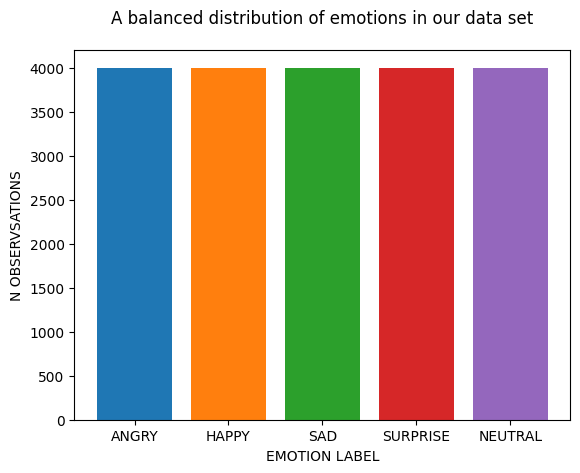

In [25]:
# generate x labels for our plot
emotion_labels = [label_map[i] for i in label_map.keys()]

# generate counts for each emotion type
emotion_counts = [np.sum(df["emotion"] == i) for i in range(len(label_map))]

# generate a bar plot for our emotion labels that has different colors
[plt.bar(x = emotion_labels[i], height = emotion_counts[i] ) for i in range(len(emotion_labels))]

# make the plot interpretable with x and y labels + title
plt.xlabel('EMOTION LABEL')
plt.ylabel('N OBSERVSATIONS')
plt.title('A balanced distribution of emotions in our data set', y=1.05);

In [26]:
# Load's dlib's pretrained face detector model
#frontalface_detector = dlib.get_frontal_face_detector()


#Load the 68 face Landmark file
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
"""
Returns facial landmarks for the given input image path
"""
def get_landmarks(image):

  #Bounding Box co-ordinates around the face(Training data is 48*48(cropped faces))
  rects = [dlib.rectangle(left=1, top=1, right=47, bottom=47)]

  #Read Image using OpenCV
  #image = cv2.imread(image_path)
  #Detect the Faces within the image
  landmarks = [(p.x, p.y) for p in predictor(image, rects[0]).parts()]
  return image,landmarks

"""
Display image with its Facial Landmarks
"""
def image_landmarks(image,face_landmarks):
  radius = -2
  circle_thickness = 1
  image_copy = image.copy()
  for (x, y) in face_landmarks:
    cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)

  plt.imshow(image_copy, interpolation='nearest', cmap='Greys_r')
  plt.xticks([]); plt.yticks([])
  plt.show()


'''
Converts pixels values to 2D-image.
Displays the image and returns the cv2 image
object
'''
def pixels_image(img_pixels,plt_flag):
  width = 48
  height = 48

  image = np.fromstring(img_pixels, dtype=np.uint8, sep=" ").reshape((height, width))

  if plt_flag:
      plt.imshow(image, interpolation='nearest', cmap="Greys_r")
      plt.xticks([]); plt.yticks([])
      plt.show()


  return image


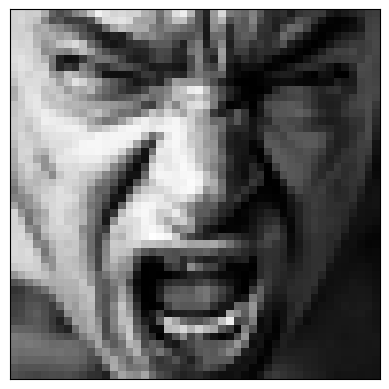

In [27]:
# select random index
i_index = 1000

# extract pixel values
image_pixels = df['pixels'][i_index]

# convert pixels to 2D Images
image = pixels_image(image_pixels, True)

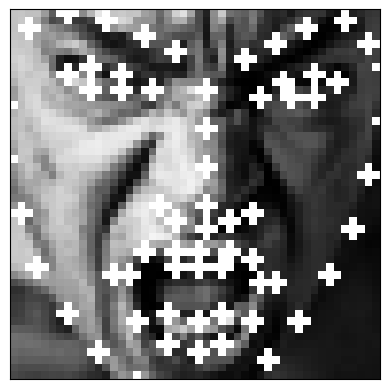

In [28]:
#Extract the Facial Landmarks
image,facial_landmarks = get_landmarks(image)
#facial_landmarks = get_landmarks(image,face_rects)
#Display the Facial Landmarks on the Image
image_landmarks(image,facial_landmarks)

In [29]:
"""
Computes euclidean distance between 68 Landmark Points for our features
e_dist is a list of features that will go into our model.
Each feature is a distance between two landmark points, and every pair of points
must have a feature.
"""
def landmarks_edist(face_landmarks):

    e_dist = []

    for i in range(len(face_landmarks)):

        for j in range(len(face_landmarks)):

            if i!= j:

                e_dist.append(distance.euclidean(face_landmarks[i], face_landmarks[j]))

    return e_dist

In [30]:
# Function that preprocesses the data to extract distances between all points

def preprocess_data(df):

  X = []
  Y = []
  X_pixels = []

  n_pixels = 2304

  for index, row in (df.iterrows()):

      if index%1000 == 0:
        print (index, "Datapoints Processed")

      try:
          image = pixels_image(row['pixels'],0)
          X_pixels.append(image.ravel())
          image = cv2.GaussianBlur(image,(5,5),0)

          _,face_landmarks = get_landmarks(image)
          X.append(landmarks_edist(face_landmarks)) # Using our feature function!
          Y.append(row['emotion'])

      except Exception as e:
          print ("An error occured:",e)

  #Save the data
  np.save("pureX", X_pixels)
  np.save("dataX", X)
  np.save("dataY", Y)

  return np.array(X_pixels),np.array(X),np.array(Y)

In [31]:
# set to True if we want to preload data -- which has already been generated for us :)
preload = True

if preload:

  # load outputs saved in this folder after running preprocess_data()
  dataX = np.load('./dataX.npy')
  dataY = np.load('./dataY.npy')

else:

  # this takes 15-20 minutes to run, but someone has already run it and saved the ouputs in this folder
  pureX, dataX, dataY = preprocess_data(df)

In [32]:
#Split Data into Train, Test (90-10)
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.1, random_state=42,stratify =dataY)

In [33]:
####Standardize the data####################
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(18000, 4556)

In [34]:
#Reduces features by maintaining 95% variance of the data
#After doing PCA on our training data, 4556 Dimensions --->reduced to 20
#Note: PCA is trained only on training data
pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test= pca.transform(X_test)
X_train.shape

(18000, 20)

In [35]:

#######Train the model##################
knn = KNeighborsClassifier(n_neighbors=10)
print ("Training the knn model")
knn.fit(X_train, y_train)

#######Evaluate the model##################
print ("Predict for KNN Model")
y_predknn = knn.predict(X_test)
print ("Prediction Completed")
print ("Test Accuracy(KNN):",metrics.accuracy_score(y_test, y_predknn))



#-----------------DecisionTreeClassifier--------------#
#######Train the model##################
dt = DecisionTreeClassifier(max_depth=20)
print ("Training the Decision Tree model")
dt.fit(X_train, y_train)
print ("Completed Decision Tree Training")

#######Evaluate the model##################

print ("Predict for Decision Tree Model")
y_preddt = dt.predict(X_test)
print ("Test Accuracy(DT):",metrics.accuracy_score(y_test, y_preddt))


#-----------------Logistic Regression--------------#
#######Train the model##################
lr = LogisticRegression(solver='lbfgs',multi_class='multinomial')
print ("Training the Logistic Regression model")
lr.fit(X_train, y_train)
print ("Completed LR Training")

#######Evaluate the model##################
# they might use accuracy_score
#This cell will take longer to run(5-10mins)!
print ("Predict for LR Model")
y_predlr = lr.predict(X_test)
print ("Test Accuracy(LR):",metrics.accuracy_score(y_test, y_predlr))

Training the knn model
Predict for KNN Model
Prediction Completed
Test Accuracy(KNN): 0.468
Training the Decision Tree model
Completed Decision Tree Training
Predict for Decision Tree Model
Test Accuracy(DT): 0.4325
Training the Logistic Regression model
Completed LR Training
Predict for LR Model
Test Accuracy(LR): 0.5015


Plotting the Confusion Matrix


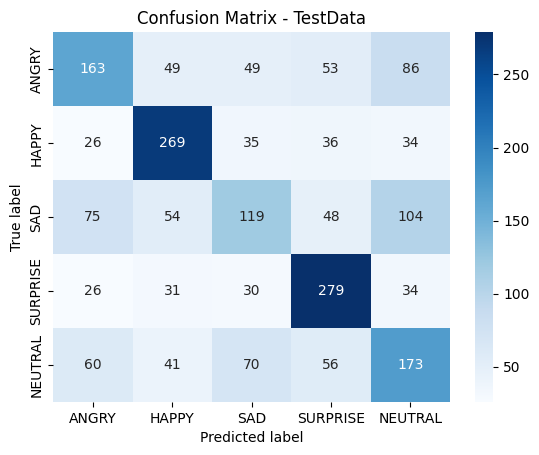

In [36]:
'''
Plots the confusion Matrix and saves it
Pass the true labels and the predicted labels
'''
def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = list(label_map.values())
  df_cm = pd.DataFrame(cm,index = labels,columns = labels)
  fig = plt.figure()
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5,3.5,4.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  #plt.savefig(fig_name)
  plt.show()
  plt.close()

plot_confusion_matrix(y_test,y_predlr)


In [37]:
#Load the true pixel data and corresponding labels
X = np.load('pureX.npy')
#X = X.reshape(len(X),-1)
#X = pureX
Y = np.load('dataY.npy')

In [38]:
#Split Data into Train, Test (90-10)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42,stratify =Y)


#Standardize the Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#PCA #Returns 264 features out of 2304
pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test= pca.transform(X_test)


#######Train the model##################
knn = KNeighborsClassifier(n_neighbors=10)
print ("Training the knn model")
knn.fit(X_train, y_train)

#######Evaluate the model##################
print ("Predict for KNN Model")
y_predknn = knn.predict(X_test)
print ("Prediction Completed")
print ("Test Accuracy(KNN):",metrics.accuracy_score(y_test, y_predknn))



#-----------------DecisionTreeClassifier--------------#
#######Train the model##################
dt = DecisionTreeClassifier(max_depth=20)
print ("Training the Decision Tree model")
dt.fit(X_train, y_train)
print ("Completed Decision Tree Training")

#######Evaluate the model##################
print ("Predict for Decision Tree Model")
y_preddt = dt.predict(X_test)
print ("Test Accuracy(DT):",metrics.accuracy_score(y_test, y_preddt))


#-----------------Logistic Regression--------------#
#######Train the model##################
lr = LogisticRegression(solver='lbfgs',multi_class='multinomial')
print ("Training the Logistic Regression model")
lr.fit(X_train, y_train)
print ("Completed LR Training")

#######Evaluate the model##################
print ("Predict for LR Model")
y_predlr = lr.predict(X_test)
print ("Test Accuracy(LR):",metrics.accuracy_score(y_test, y_predlr))

Training the knn model
Predict for KNN Model
Prediction Completed
Test Accuracy(KNN): 0.3545
Training the Decision Tree model
Completed Decision Tree Training
Predict for Decision Tree Model
Test Accuracy(DT): 0.3055
Training the Logistic Regression model
Completed LR Training
Predict for LR Model
Test Accuracy(LR): 0.404


In [39]:
# extract images as vectors, convert from strings to ints -- this is called a "list comprihension"
x_image = np.array( [np.fromstring(df['pixels'][i], dtype=np.uint8, sep=" ") for i in range(len(df))] )

# extract labels in the same way--through a list comprehension
y_image = np.array( [df['emotion'][i] for i in range(len(df)) ])

# generate train-test (90/10) splits
X_train, X_test, y_train, y_test = train_test_split(x_image, y_image, test_size=0.1,random_state=42)

# define the model
knn = KNeighborsClassifier(n_neighbors=10)

# train
print ("training knn model ...")
knn.fit(X_train, y_train)

# test
print ("Predict for KNN Model")
y_pred_knn = knn.predict(X_test)

# display results
print ("KNN Test Accuracy on raw image inputs:", metrics.accuracy_score(y_test, y_pred_knn))

training knn model ...
Predict for KNN Model
KNN Test Accuracy on raw image inputs: 0.359


In [40]:
#@title Trying with Neural Networks

from sklearn.metrics import accuracy_score
from tqdm import tqdm,tqdm_pandas

import re
import gdown
import keras

from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

def model_to_string(model):
    import re
    stringlist = []
    model.summary(print_fn=lambda x: stringlist.append(x))
    sms = "\n".join(stringlist)
    sms = re.sub('_\d\d\d','', sms)
    sms = re.sub('_\d\d','', sms)
    sms = re.sub('_\d','', sms)
    return sms

###Getting the csv data loaded

dataset_url = 'https://drive.google.com/uc?id=1xFiYsULlQWWmi2Ai0fHjtApniP5Pscuf'
dataset_path = './ferdata.csv'
gdown.download(dataset_url, dataset_path, True)

###Getting the Dlib Shape predictor

dlibshape_url = 'https://drive.google.com/uc?id=17D3D89Gke6i5nKOvmsbPslrGg5rVgOwg'
dlibshape_path ='./shape_predictor_68_face_landmarks.dat'
gdown.download(dlibshape_url, dlibshape_path, True)

###Getting the Xpure loaded

pureX_url = 'https://drive.google.com/uc?id=1CglpXodenZVrkaZehLtfykfQv8dcnfO9'
pureX_path = './pureX.npy'
gdown.download(pureX_url, pureX_path,True)

###Getting the Xdata loaded

dataX_url = 'https://drive.google.com/uc?id=1sIJGxUM6rNBcWxucs6iynDepeKU1Q56p'
dataX_path = './dataX.npy'
gdown.download(dataX_url, dataX_path, True)


###Getting the Ydata loaded

dataY_url = 'https://drive.google.com/uc?id=1Rfr0OP-hZO_UZfuOyMNR2RjNRAro85zE'
dataY_path = './dataY.npy'
gdown.download(dataY_url, dataY_path, True)


print ("Data Downloaded!")


'''
Plots the confusion Matrix and saves it
'''
def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = list(label_map.values())
  df_cm = pd.DataFrame(cm,index = labels,columns = labels)
  fig = plt.figure()
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5,3.5,4.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  plt.show()
  plt.close()

def plot_graphs(history, best):

  plt.figure(figsize=[10,4])
  # summarize history for accuracy
  plt.subplot(121)
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy across training\n best accuracy of %.02f'%best[1])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  # summarize history for loss
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss across training\n best loss of %.02f'%best[0])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

#Integer to Label Mapping
label_map = {"0":"ANGRY","1":"HAPPY","2":"SAD","3":"SURPRISE","4":"NEUTRAL"}


#Load the 68 face Landmark file
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
"""
Returns facial landmarks for the given input image path
"""
def get_landmarks(image):
  #Bounding Box co-ordinates around the face(Training data is 48*48(cropped faces))
  rects = [dlib.rectangle(left=1, top=1, right=47, bottom=47)]

  #Read Image using OpenCV
  #image = cv2.imread(image_path)
  #Detect the Faces within the image
  landmarks = [(p.x, p.y) for p in predictor(image, rects[0]).parts()]
  return image,landmarks

"""
Display image with its Facial Landmarks
"""
def image_landmarks(image,face_landmarks):
  radius = -4
  circle_thickness = 1
  image_copy = image.copy()
  for (x, y) in face_landmarks:
    cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)

  plt.imshow(image_copy, interpolation='nearest')
  plt.show()

"""
Computes euclidean distance between 68 Landmark Points for our features
e_dist is a list of features that will go into our model.
Each feature is a distance between two landmark points, and every pair of points
must have a feature.
"""

def landmarks_edist(face_landmarks):
    e_dist = []
    for i in range(len(face_landmarks)):
        for j in range(len(face_landmarks)):
            if i!= j:
                e_dist.append(distance.euclidean(face_landmarks[i],face_landmarks[j]))
    return e_dist

def compare_learning(mlp, lm, cnn, vgg): # there's one model missing: MLP from pixels

  # summarize history for accuracy
  plt.plot(vgg.history['val_acc'],)
  plt.plot(cnn.history['val_acc'])
  plt.plot(mlp.history['val_acc'],)
  plt.plot(lm.history['val_acc'])
  plt.ylabel('validitation accuracy')
  plt.xlabel('epoch')
  plt.legend(['cnn_transfer', 'cnn_scratch', 'mlp_pixels', 'mlp_landmarks'], bbox_to_anchor=[1,1])
  plt.xticks(range(0, epochs+1, 5), range(0, epochs+1, 5))
  plt.show()


Data Downloaded!


In [41]:
# the number of times we pass all the training data through the model
epochs = 20
# the number of examples we pass to the model at each time
batch_size = 64
# the proportion of testing data we set aside (e.g. 10%)
test_ratio = .1
# the number of emotion categories we have to predict
n_labels = 5
# load data
dataX_pixels = np.load('pureX.npy')
dataY_pixels = np.load('dataY.npy')

In [42]:
# convert labels to one hot encoding
y_onehot = keras.utils.to_categorical(dataY_pixels, len(set(dataY_pixels)))

In [43]:
# what does this data type look like?
print( dataY_pixels[0] )

print( y_onehot[0] )

0
[1. 0. 0. 0. 0.]


In [44]:
# split Data into Train, Test (90-10)
X_train, X_test, y_train, y_test = train_test_split(dataX_pixels, y_onehot, test_size=test_ratio, random_state=42)

#### Standardize the data ##########
pixel_scaler = StandardScaler()
pixel_scaler.fit(X_train)
X_train = pixel_scaler.transform(X_train)
X_test = pixel_scaler.transform(X_test)

In [45]:
mlp_model = Sequential()
mlp_model.add(Dense(5120, activation='relu',kernel_initializer='glorot_normal', input_shape=( X_train.shape[1]   ,)))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(512,kernel_initializer='glorot_normal', activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(256,kernel_initializer='glorot_normal', activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(n_labels, activation='softmax'))

In [46]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5120)              11801600  
                                                                 
 dropout (Dropout)           (None, 5120)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               2621952   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 1

In [47]:
# Compiling the model with SGD optimixer and categorical crossentropy loss
mlp_model.compile(loss=categorical_crossentropy, optimizer=SGD(lr=0.001), metrics=['accuracy'])

#Saves the Best Model Based on Val Loss
checkpoint = ModelCheckpoint('best_mlp_model.h5', verbose=1, monitor='val_acc', save_best_only=True,  mode='auto')

In [48]:
#training the model
mlp_history = mlp_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                            callbacks=[checkpoint], validation_data=(X_test, y_test), shuffle=True)

Epoch 1/20
280/282 [============================>.] - ETA: 0s - loss: 1.7134 - accuracy: 0.2687

282/282 [==============================] - 5s 7ms/step - loss: 1.7125 - accuracy: 0.2687 - val_loss: 1.5175 - val_accuracy: 0.3385
Epoch 2/20
276/282 [============================>.] - ETA: 0s - loss: 1.5501 - accuracy: 0.3126

282/282 [==============================] - 2s 6ms/step - loss: 1.5490 - accuracy: 0.3130 - val_loss: 1.4850 - val_accuracy: 0.3520
Epoch 3/20
278/282 [============================>.] - ETA: 0s - loss: 1.5020 - accuracy: 0.3380

282/282 [==============================] - 2s 6ms/step - loss: 1.5017 - accuracy: 0.3384 - val_loss: 1.4610 - val_accuracy: 0.3765
Epoch 4/20
278/282 [============================>.] - ETA: 0s - loss: 1.4685 - accuracy: 0.3561

282/282 [==============================] - 2s 6ms/step - loss: 1.4682 - accuracy: 0.3564 - val_loss: 1.4472 - val_accuracy: 0.3945
Epoch 5/20
276/282 [============================>.] - ETA: 0s - loss: 1.4437 - accuracy: 0.3740

282/282 [==============================] - 2s 6ms/step - loss: 1.4436 - accuracy: 0.3735 - val_loss: 1.4258 - val_accuracy: 0.4015
Epoch 6/20
275/282 [============================>.] - ETA: 0s - loss: 1.4311 - accuracy: 0.3819

282/282 [==============================] - 2s 7ms/step - loss: 1.4303 - accuracy: 0.3827 - val_loss: 1.4108 - val_accuracy: 0.4120
Epoch 7/20
281/282 [============================>.] - ETA: 0s - loss: 1.4137 - accuracy: 0.3935

282/282 [==============================] - 2s 6ms/step - loss: 1.4136 - accuracy: 0.3936 - val_loss: 1.3999 - val_accuracy: 0.4160
Epoch 8/20
277/282 [============================>.] - ETA: 0s - loss: 1.3985 - accuracy: 0.4003

282/282 [==============================] - 2s 6ms/step - loss: 1.3983 - accuracy: 0.4009 - val_loss: 1.3891 - val_accuracy: 0.4325
Epoch 9/20
279/282 [============================>.] - ETA: 0s - loss: 1.3796 - accuracy: 0.4102

282/282 [==============================] - 2s 6ms/step - loss: 1.3804 - accuracy: 0.4097 - val_loss: 1.3806 - val_accuracy: 0.4355
Epoch 10/20
279/282 [============================>.] - ETA: 0s - loss: 1.3689 - accuracy: 0.4160

282/282 [==============================] - 2s 6ms/step - loss: 1.3685 - accuracy: 0.4164 - val_loss: 1.3707 - val_accuracy: 0.4385
Epoch 11/20
277/282 [============================>.] - ETA: 0s - loss: 1.3520 - accuracy: 0.4255

282/282 [==============================] - 2s 6ms/step - loss: 1.3523 - accuracy: 0.4251 - val_loss: 1.3628 - val_accuracy: 0.4550
Epoch 12/20
276/282 [============================>.] - ETA: 0s - loss: 1.3473 - accuracy: 0.4302

282/282 [==============================] - 2s 6ms/step - loss: 1.3477 - accuracy: 0.4305 - val_loss: 1.3509 - val_accuracy: 0.4560
Epoch 13/20
281/282 [============================>.] - ETA: 0s - loss: 1.3321 - accuracy: 0.4377

282/282 [==============================] - 2s 7ms/step - loss: 1.3321 - accuracy: 0.4378 - val_loss: 1.3407 - val_accuracy: 0.4445
Epoch 14/20
280/282 [============================>.] - ETA: 0s - loss: 1.3178 - accuracy: 0.4475

282/282 [==============================] - 2s 7ms/step - loss: 1.3175 - accuracy: 0.4478 - val_loss: 1.3308 - val_accuracy: 0.4505
Epoch 15/20
278/282 [============================>.] - ETA: 0s - loss: 1.3092 - accuracy: 0.4510

282/282 [==============================] - 2s 6ms/step - loss: 1.3098 - accuracy: 0.4506 - val_loss: 1.3273 - val_accuracy: 0.4590
Epoch 16/20
278/282 [============================>.] - ETA: 0s - loss: 1.2958 - accuracy: 0.4589

282/282 [==============================] - 2s 6ms/step - loss: 1.2950 - accuracy: 0.4589 - val_loss: 1.3160 - val_accuracy: 0.4600
Epoch 17/20
277/282 [============================>.] - ETA: 0s - loss: 1.2816 - accuracy: 0.4684

282/282 [==============================] - 2s 6ms/step - loss: 1.2801 - accuracy: 0.4692 - val_loss: 1.3117 - val_accuracy: 0.4635
Epoch 18/20
279/282 [============================>.] - ETA: 0s - loss: 1.2759 - accuracy: 0.4674

282/282 [==============================] - 3s 11ms/step - loss: 1.2762 - accuracy: 0.4674 - val_loss: 1.3026 - val_accuracy: 0.4640
Epoch 19/20
280/282 [============================>.] - ETA: 0s - loss: 1.2682 - accuracy: 0.4745

282/282 [==============================] - 4s 15ms/step - loss: 1.2684 - accuracy: 0.4743 - val_loss: 1.2914 - val_accuracy: 0.4705
Epoch 20/20
280/282 [============================>.] - ETA: 0s - loss: 1.2549 - accuracy: 0.4794

282/282 [==============================] - 2s 7ms/step - loss: 1.2547 - accuracy: 0.4794 - val_loss: 1.2894 - val_accuracy: 0.4680


In [49]:
mlp_performance = mlp_model.evaluate(X_test, y_test, batch_size=64)


32/32 [==============================] - 0s 3ms/step - loss: 1.2894 - accuracy: 0.4680


In [50]:
#@title Convolutional Neural Network

In [51]:
# use the same epochs and batch size as above
width, height = int(np.sqrt(X_train.shape[1])), int(np.sqrt(X_train.shape[1]))
# pixels were vectors so resize
print(X_train.shape)

(18000, 2304)


In [52]:
X_train_cnn = X_train.reshape(len(X_train),height,width)
X_test_cnn = X_test.reshape(len(X_test),height,width)

# convert them to images
print(X_train_cnn.shape)

(18000, 48, 48)


In [53]:
# add one more dimension for model compatability
X_train_cnn = np.expand_dims(X_train_cnn,3)
X_test_cnn = np.expand_dims(X_test_cnn,3)

print(X_train_cnn.shape)

(18000, 48, 48, 1)


In [54]:
# initialize model
cnn_model = Sequential()
# this conv layer has 64 filters, the input shape needs to be the same dimensions of the image
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1)))
# batch normalization
cnn_model.add(BatchNormalization())
# max pooling
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# dropout
cnn_model.add(Dropout(0.5))

# flatten all the outputs between convolutional and dense layers
cnn_model.add(Flatten())
# add a "dense layer" (i.e. the fully connected layers in MLPs) with dropout
cnn_model.add(Dense(512, activation='relu'))
# output layer
cnn_model.add(Dense(n_labels, activation='softmax'))

In [55]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), kernel_regularizer=l2(0.01)))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn_model.add(Dropout(0.5))

cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn_model.add(Dropout(0.5))

cnn_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn_model.add(Dropout(0.5))

cnn_model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())

cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(n_labels, activation='softmax'))


In [56]:
#Saves the Best Model Based on Val Loss
checkpoint = ModelCheckpoint('best_cnn_model.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

# compliling the model with adam optimixer and categorical crossentropy loss
cnn_model.compile(loss=categorical_crossentropy, optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])

# training the model
cnn_history = cnn_model.fit(X_train_cnn, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                            callbacks=[checkpoint], validation_data=(X_test_cnn, y_test), shuffle=True)

Epoch 1/20
282/282 [==============================] - ETA: 0s - loss: 1.8177 - accuracy: 0.2278
Epoch 1: val_loss improved from inf to 1.62396, saving model to best_cnn_model.h5
282/282 [==============================] - 28s 61ms/step - loss: 1.8177 - accuracy: 0.2278 - val_loss: 1.6240 - val_accuracy: 0.2065
Epoch 2/20
281/282 [============================>.] - ETA: 0s - loss: 1.6118 - accuracy: 0.2537
Epoch 2: val_loss improved from 1.62396 to 1.58137, saving model to best_cnn_model.h5
282/282 [==============================] - 16s 56ms/step - loss: 1.6117 - accuracy: 0.2537 - val_loss: 1.5814 - val_accuracy: 0.2530
Epoch 3/20
281/282 [============================>.] - ETA: 0s - loss: 1.5149 - accuracy: 0.3111
Epoch 3: val_loss improved from 1.58137 to 1.46752, saving model to best_cnn_model.h5
282/282 [==============================] - 16s 56ms/step - loss: 1.5151 - accuracy: 0.3110 - val_loss: 1.4675 - val_accuracy: 0.3385
Epoch 4/20
281/282 [============================>.] - ETA: 

In [58]:
cnn_performance = cnn_model.evaluate(X_test_cnn, y_test, batch_size=64)

32/32 [==============================] - 1s 17ms/step - loss: 0.9219 - accuracy: 0.6560


In [ ]:
#Human Performance was tested to be less than 65%, and this CNN gives an accuracy greater than that